# Loading

In [ ]:
!pip install scglue
!pip install scanpy
!pip install matplotlib==3.5
import anndata
import networkx as nx
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import rcParams
import scglue

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!cp /content/drive/MyDrive/MI/prior.graphml.gz /content

In [ ]:
!cp /content/drive/MyDrive/MI/scRNA_glue.h5ad /content
!cp /content/drive/MyDrive/MI/scATAC_glue.h5ad /content
!cp /content/drive/MyDrive/MI/final.dill /content

# Single Cell Pair Preprocess

In [ ]:
import anndata
rna = anndata.read_h5ad("scRNA_glue.h5ad")
atac = anndata.read_h5ad("scATAC_glue.h5ad")

In [ ]:
rna.obs['domain']='scRNA-seq'
atac.obs['domain']='scATAC-seq'

In [ ]:
graph = nx.read_graphml("prior.graphml.gz")
glue = scglue.models.load_model("final.dill")
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [ ]:
combined = anndata.concat([rna, atac])

In [ ]:
combined

AnnData object with n_obs × n_vars = 60828 × 0
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Type', 'domain'
    obsm: 'X_pca', 'X_umap', 'X_glue'

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


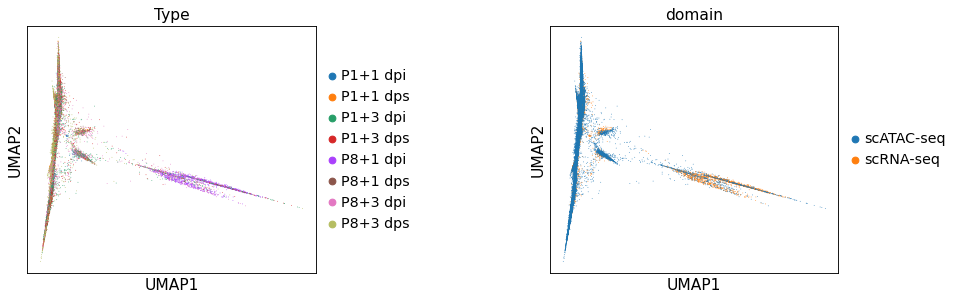

In [ ]:
# 这里需要 pip install matplotlib==3.1.3（更高版本应该也行？）
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["Type", "domain"], wspace=0.65)

In [ ]:
rna.obs[rna.obs.Operation_time == '3days']

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain
P8_3Sham_AAACCTGCATCGATTG-1,neg,Sham,3days,P8+3 dps,1302,1302,6222.0,0.0,0.0,19,scRNA-seq
P8_3Sham_AAACCTGTCAGTTTGG-1,neg,Sham,3days,P8+3 dps,1399,1399,2688.0,0.0,0.0,25,scRNA-seq
P8_3Sham_AAACGGGAGCTAGTGG-1,neg,Sham,3days,P8+3 dps,960,959,3616.0,0.0,0.0,19,scRNA-seq
P8_3Sham_AAACGGGCATCGATTG-1,neg,Sham,3days,P8+3 dps,426,426,592.0,0.0,0.0,0,scRNA-seq
P8_3Sham_AAACGGGGTAGCTTGT-1,neg,Sham,3days,P8+3 dps,2266,2263,6935.0,0.0,0.0,0,scRNA-seq
...,...,...,...,...,...,...,...,...,...,...,...
P1_3MI_TTTGTCAAGCTAGTGG-1,pos,MI,3days,P1+3 dpi,2974,2974,9501.0,0.0,0.0,2,scRNA-seq
P1_3MI_TTTGTCAAGCTGATAA-1,pos,MI,3days,P1+3 dpi,1591,1591,6010.0,0.0,0.0,19,scRNA-seq
P1_3MI_TTTGTCAAGTGAAGTT-1,pos,MI,3days,P1+3 dpi,2609,2608,7980.0,0.0,0.0,2,scRNA-seq
P1_3MI_TTTGTCACAGATCGGA-1,pos,MI,3days,P1+3 dpi,1403,1401,2851.0,0.0,0.0,16,scRNA-seq


In [ ]:
rna = rna[rna.obs.Operation_time == '3days']

In [ ]:
rna

View of AnnData object with n_obs × n_vars = 9679 × 2778
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'dell'
    uns: 'Stem_Cell_Property_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_glue'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# 细胞类型标注

In [ ]:
!pip3 install leidenalg

In [ ]:
sc.pp.neighbors(rna, n_neighbors=20, n_pcs=40)
sc.tl.leiden(rna)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [ ]:
sc.tl.paga(rna)
sc.pl.paga(rna, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(rna, init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [ ]:
!pip install werkzeug==2.0.3

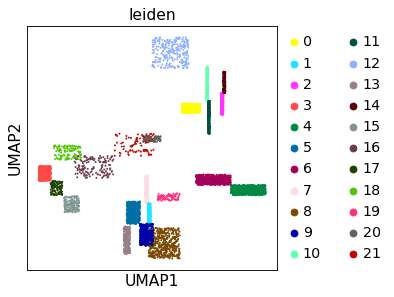

In [ ]:
sc.pl.umap(rna, color=['leiden'])

In [ ]:
sc.pp.log1p(rna)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:322: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


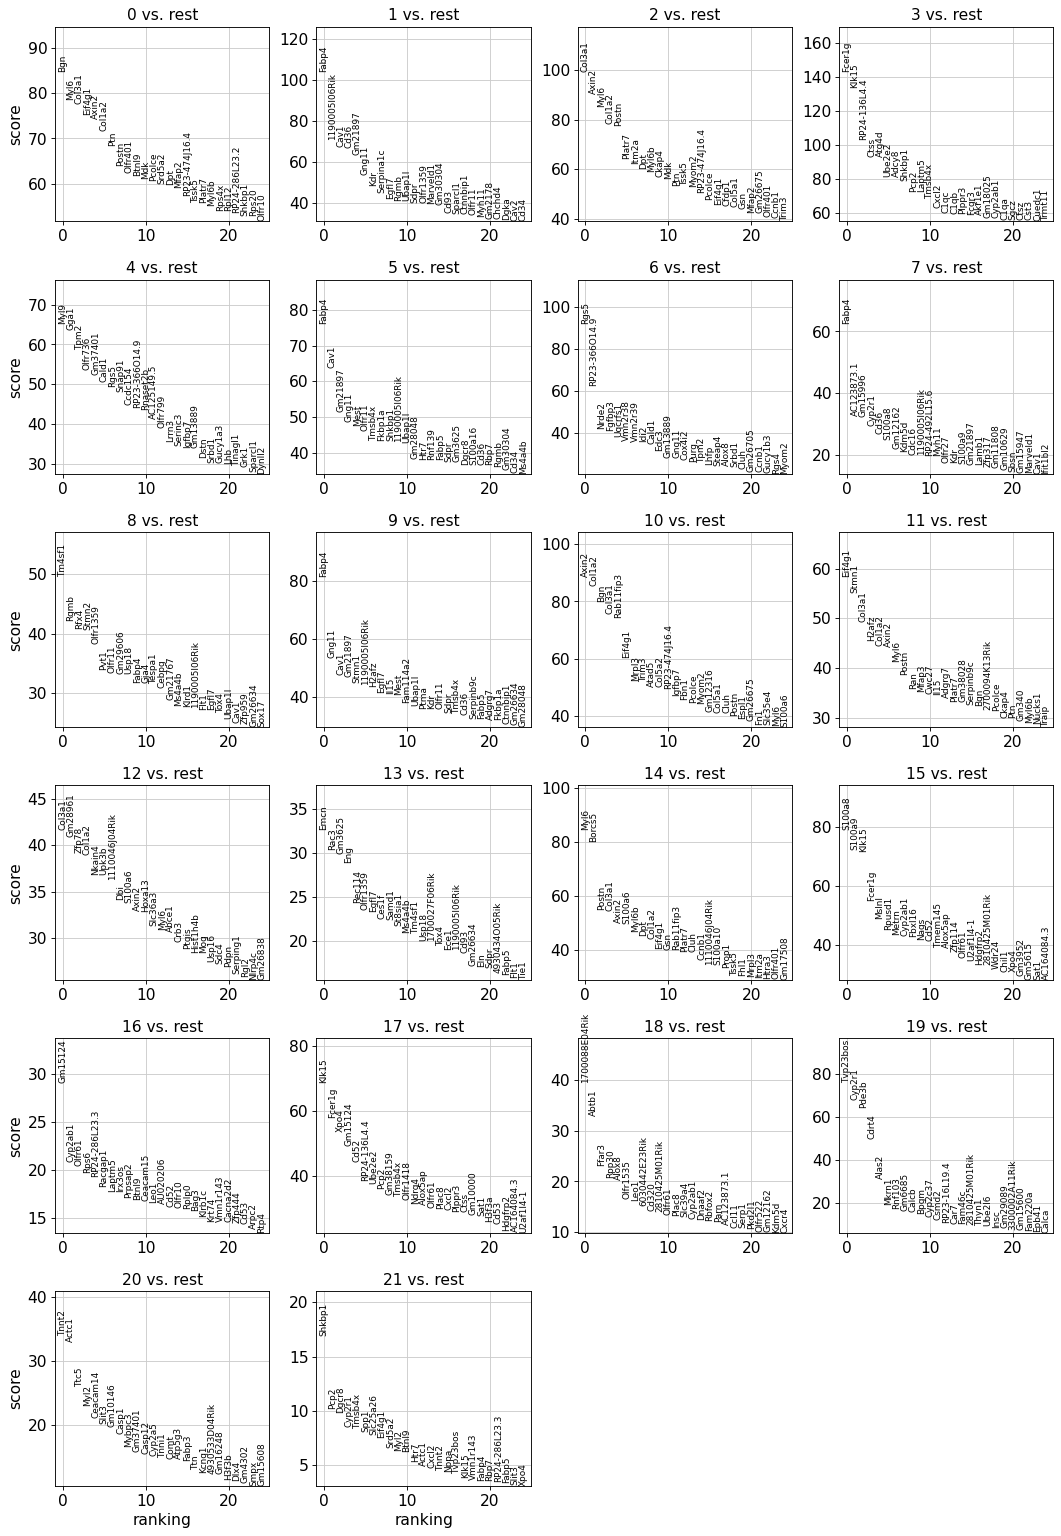

In [ ]:
sc.tl.rank_genes_groups(rna, 'leiden', method='t-test')
sc.pl.rank_genes_groups(rna, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(rna, 'leiden', method='wilcoxon')
result = rna.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("rna.csv")
dat.to_csv("/content/drive/MyDrive/MI/rna.csv")

ranking genes
    finished (0:00:20)


In [ ]:
dat

,0_n,0_l,0_s,0_p,1_n,1_l,1_s,1_p,2_n,2_l,...,19_s,19_p,20_n,20_l,20_s,20_p,21_n,21_l,21_s,21_p
0,Bgn,3.076535,42.850960,0.000000e+00,Fabp4,3.716086,44.470425,0.000000e+00,Myl6,4.076012,...,16.517166,2.760668e-61,Actc1,7.139771,15.613892,5.855421e-55,Shkbp1,3.406878,11.614414,3.481679e-31
1,Ptn,3.543228,42.279888,0.000000e+00,Cd36,3.593859,42.274380,0.000000e+00,Col3a1,3.876831,...,16.504719,3.393048e-61,Tnnt2,6.723586,15.529884,2.177709e-54,Dgcr8,1.103587,10.140439,3.654528e-24
2,Srd5a2,1.156760,40.248272,0.000000e+00,1190005I06Rik,3.405068,41.850758,0.000000e+00,Itm2a,3.525972,...,16.479826,5.123191e-61,Ttc5,6.442620,14.854877,6.468686e-50,Cyp2r1,2.066693,9.914504,3.600391e-23
3,Btnl9,1.183307,40.105942,0.000000e+00,Gm21897,3.374681,41.020363,0.000000e+00,Postn,3.574772,...,16.310951,8.249739e-60,Myl2,6.116978,14.335943,1.304625e-46,Pcp2,2.878836,9.073135,1.156401e-19
4,Rps4x,1.023912,39.470108,0.000000e+00,Cav1,3.029396,40.149029,0.000000e+00,Axin2,3.852299,...,15.959763,2.436577e-57,Casp1,8.529842,14.036680,9.296624e-45,Htr7,0.701843,8.739011,2.351599e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20148,Gm15996,-0.449180,-19.852461,1.049331e-87,Tssk5,-5.629148,-34.253143,3.915960e-257,Pcp2,-4.471306,...,-12.816078,1.332724e-37,B2m,-2.964353,-11.633694,2.778111e-31,Zfp317,-3.862340,-11.004872,3.620287e-28
20149,Rpl35,-0.702494,-20.038095,2.563967e-89,Col3a1,-4.051725,-34.479050,1.653232e-260,Ubap1l,-4.588771,...,-12.852181,8.361844e-38,Cfap70,-1.976531,-11.788271,4.486583e-32,Olfr221,-3.711092,-11.122734,9.724591e-29
20150,Gm20821,-2.227049,-20.665455,7.088698e-95,Myom2,-3.108504,-35.990410,1.181681e-283,Cav1,-4.366717,...,-12.939552,2.691933e-38,Cluh,-2.893934,-12.039399,2.205551e-33,Rpl35,-3.805508,-11.206560,3.786225e-29
20151,Gm21767,-2.028452,-26.084209,5.508047e-150,Bgn,-4.689179,-37.469639,2.876813e-307,Tmsb4x,-1.366783,...,-13.044431,6.836530e-39,Vim,-3.152025,-12.161174,5.003449e-34,Rpl7a,-3.960866,-11.243308,2.498400e-29


In [ ]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git

fatal: destination path 'SCSA' already exists and is not an empty directory.


In [ ]:
# pandas 版本需要为1.2.4，否则会报错
!pip install pandas==1.2.4
import pandas as pd

In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i rna.csv -s scanpy -k Heart -E -g Mouse -f 1.5 -p 0.01 -o '/content/rna_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='rna.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/rna_result.txt', pvalue=0.01, source='scanpy', species='Mouse', target='cellmarker', tissue='Heart', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 117
############################## Cluster 0 ##############################

Cell Num: 2
Gene Num: 5
Not Zero: 5
Cluster 0 Gene number: 208
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
Good                Fibroblast          0.7071    1.0  
------------------------------------------------------------

Go Enrichment analysis: Group1: 5 Group2: 18
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<

In [ ]:
cmdt=pd.read_csv('rna_result.txt',sep='\t')
cmdt

,Cell Type,Z-score,Cluster
0,Fibroblast,0.707107,0
1,Macrophage,-0.707107,0
2,Endothelial cell,1.788704,1
3,Cardiac progenitor cell,-0.424736,1
4,Atrial cell,-0.454656,1
5,Ventricular compact cell,-0.454656,1
6,Ventricular trabecular cell,-0.454656,1
7,Fibroblast,0.707107,10
8,Cardiomyocyte,-0.707107,10
9,Fibroblast,0.707107,11


In [ ]:
cmdt=cmdt.append([{'Cluster':6}])
cmdt=cmdt.append([{'Cluster':15}])
cmdt=cmdt.append([{'Cluster':16}])
cmdt=cmdt.append([{'Cluster':17}])
cmdt=cmdt.append([{'Cluster':18}])
cmdt=cmdt.append([{'Cluster':19}])
cmdt.to_csv("/content/drive/MyDrive/MI/cmdt.csv")

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(rna.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Fibroblast' 0.7071067811865476 0]]
[['Endothelial cell' 1.7887042470061572 1]]
[['Fibroblast' 1.154556251100974 2]]
[['Macrophage' 2.620841104061772 3]]
[['Cardiomyocyte' 0.3117249297608871 4]]
[['Endothelial cell' 1.7758443292314454 5]]
[[nan nan 6]]
[['Endothelial cell' 0.7071067811865475 7]]
[['Endothelial cell' 1.4668583024749635 8]]
[['Endothelial cell' 1.7888531787498467 9]]
[['Fibroblast' 0.7071067811865476 10]]
[['Fibroblast' 0.7071067811865476 11]]
[['Fibroblast' 1.1619876723523006 12]]
[['Endothelial cell' 1.788658540963751 13]]
[['Fibroblast' 2.753367672536184 14]]
[[nan nan 15]]
[[nan nan 16]]
[[nan nan 17]]
[[nan nan 18]]
[[nan nan 19]]
[['Cardiomyocyte' 45.79402053392923 20]]
[['Cardiomyocyte' 7.964122355750984 21]]


In [ ]:
cmn(i)[0][0]

'Cardiomyocyte'

In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(rna.obs.leiden))))]
#celltype[14]='Stem cell'
celltype[6]='Other'
celltype[15]='Other'
celltype[16]='Other'
celltype[17]='Other'
celltype[18]='Other'
celltype[19]='Other'
celltype

['Fibroblast',
 'Endothelial cell',
 'Fibroblast',
 'Macrophage',
 'Cardiomyocyte',
 'Endothelial cell',
 'Other',
 'Endothelial cell',
 'Endothelial cell',
 'Endothelial cell',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Endothelial cell',
 'Fibroblast',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Cardiomyocyte',
 'Cardiomyocyte']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Cardiomyocyte,0.000000,0.000000,-0.561470,0.000000,0.311725,0.000000,0.0,-0.707107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,45.794021,7.964122
Macrophage,-0.707107,0.000000,-0.593086,2.620841,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Endothelial cell,0.000000,1.788704,0.000000,0.000000,0.000000,1.775844,0.0,0.707107,1.466858,1.788853,...,0.000000,1.788659,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Fibroblast,0.707107,0.000000,1.154556,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.161988,0.000000,2.753368,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
for i in range(len(k.columns)):
  d=k.iloc[:,i]
  Max = d.max()
  Min = d.min()
  if Max!=0:
    k.iloc[:,i] = ((d-Min)/(Max-Min)).tolist()

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Fibroblast',
 'Endothelial cell',
 'Fibroblast-1',
 'Macrophage',
 'Cardiomyocyte',
 'Endothelial cell-1',
 'Other',
 'Endothelial cell-2',
 'Endothelial cell-3',
 'Endothelial cell-4',
 'Fibroblast-2',
 'Fibroblast-3',
 'Fibroblast-4',
 'Endothelial cell-5',
 'Fibroblast-5',
 'Other-1',
 'Other-2',
 'Other-3',
 'Other-4',
 'Other-5',
 'Cardiomyocyte-1',
 'Cardiomyocyte-2']

Text(899.0972222222223, 0.5, 'Cell type')

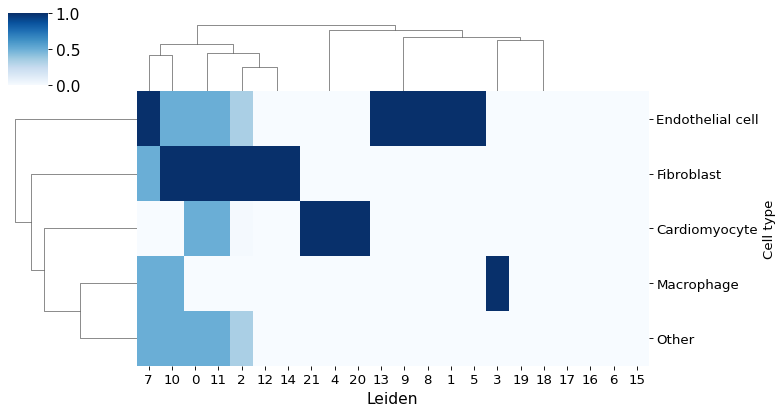

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
a = sns.clustermap(k,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden")
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)

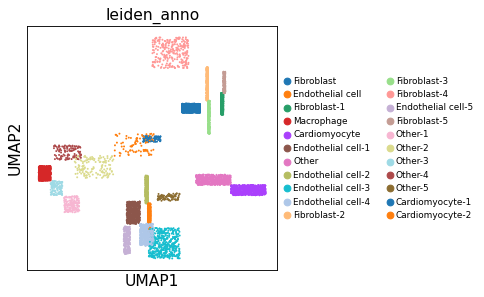

In [ ]:
#sc.pp.pca(adata)
#sc.pp.neighbors(adata,metric="cosine")
#sc.tl.umap(adata,random_state=41822099)
rna.obs['leiden_anno'] = rna.obs['leiden']
rna.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(rna, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

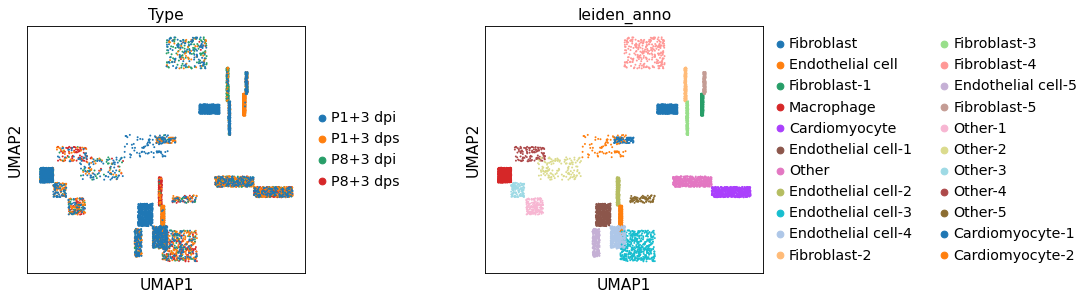

In [ ]:
sc.pl.umap(rna, color=['Type','leiden_anno'],wspace=0.5)

In [ ]:
rna.obs['leiden_anno']

P8_3Sham_AAACCTGCATCGATTG-1               Other-1
P8_3Sham_AAACCTGTCAGTTTGG-1                 Other
P8_3Sham_AAACGGGAGCTAGTGG-1               Other-1
P8_3Sham_AAACGGGCATCGATTG-1    Endothelial cell-2
P8_3Sham_AAACGGGGTAGCTTGT-1    Endothelial cell-2
                                      ...        
P1_3MI_TTTGTCAAGCTAGTGG-1            Fibroblast-5
P1_3MI_TTTGTCAAGCTGATAA-1                 Other-1
P1_3MI_TTTGTCAAGTGAAGTT-1              Fibroblast
P1_3MI_TTTGTCACAGATCGGA-1      Endothelial cell-5
P1_3MI_TTTGTCATCTGGCGTG-1      Endothelial cell-1
Name: leiden_anno, Length: 9679, dtype: category
Categories (22, object): ['Fibroblast', 'Endothelial cell', 'Fibroblast-1', 'Macrophage', ...,
                          'Other-4', 'Other-5', 'Cardiomyocyte-1', 'Cardiomyocyte-2']

In [ ]:
rna.write_h5ad('/content/drive/MyDrive/MI/rna_glue_pre.h5ad',compression="gzip")

# COSG 标记基因鉴定
#### https://github.com/genecell/COSG/blob/main/tutorials/COSG-tutorial.ipynb

In [ ]:
rna_glue_pre = anndata.read_h5ad("/content/drive/MyDrive/MI/rna_glue_pre.h5ad")

In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq.h5ad")

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
rna = rna[rna_glue_pre.obs.index,:]
rna.obs = rna_glue_pre.obs
rna.obs['CellTypes']=rna.obs['leiden_anno']
rna

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 9679 × 27998
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes'

这里用原始数据做COSG，防止出现奇奇怪怪的bug，预处理过程和之前一样

In [ ]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.2.4 scikit-learn==1.0.2 statsmodels==0.10.2 python-igraph==0.9.10


In [ ]:
np.unique(rna.obs['CellTypes'])

array(['Cardiomyocyte', 'Cardiomyocyte-1', 'Cardiomyocyte-2',
       'Endothelial cell', 'Endothelial cell-1', 'Endothelial cell-2',
       'Endothelial cell-3', 'Endothelial cell-4', 'Endothelial cell-5',
       'Fibroblast', 'Fibroblast-1', 'Fibroblast-2', 'Fibroblast-3',
       'Fibroblast-4', 'Fibroblast-5', 'Macrophage', 'Other', 'Other-1',
       'Other-2', 'Other-3', 'Other-4', 'Other-5'], dtype=object)

In [ ]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


2935


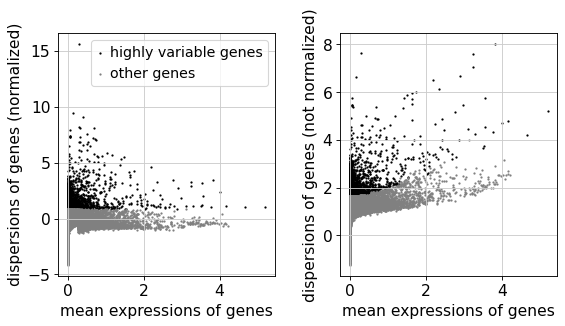

In [ ]:
sc.pp.highly_variable_genes(rna,n_top_genes=2935)
print(sum(rna.var.highly_variable))
sc.pl.highly_variable_genes(rna)

In [ ]:
# Run PCA
use_highly_variable=True
from sklearn.preprocessing import StandardScaler
expr = rna[:, rna.var['highly_variable']].X if use_highly_variable else adata.X
expr=StandardScaler(with_mean=False).fit_transform(expr)
expr[expr > 10] = 10
from sklearn.decomposition import TruncatedSVD
transformer = TruncatedSVD(n_components=50, random_state=42)
rna.obsm['X_pca']= transformer.fit_transform(expr)

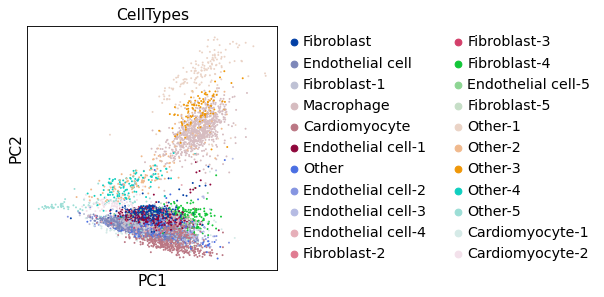

In [ ]:
sc.pl.pca(rna,color='CellTypes')

In [ ]:
#Reorder the CellTypes
%%time
sc.tl.dendrogram(rna,groupby='CellTypes',use_rep='X_pca')

Storing dendrogram info using `.uns['dendrogram_CellTypes']`


CPU times: user 12.3 ms, sys: 1.03 ms, total: 13.4 ms
Wall time: 11.7 ms


In [ ]:
celltype=rna.obs['CellTypes'].values.copy()
new_order=rna.uns["dendrogram_CellTypes"]['categories_ordered']
celltype=celltype.reorder_categories(new_order)

In [ ]:
rna.obs['CellTypes']=celltype
rna.obs['CellTypes']

P8_3Sham_AAACCTGCATCGATTG-1               Other-1
P8_3Sham_AAACCTGTCAGTTTGG-1                 Other
P8_3Sham_AAACGGGAGCTAGTGG-1               Other-1
P8_3Sham_AAACGGGCATCGATTG-1    Endothelial cell-2
P8_3Sham_AAACGGGGTAGCTTGT-1    Endothelial cell-2
                                      ...        
P1_3MI_TTTGTCAAGCTAGTGG-1            Fibroblast-5
P1_3MI_TTTGTCAAGCTGATAA-1                 Other-1
P1_3MI_TTTGTCAAGTGAAGTT-1              Fibroblast
P1_3MI_TTTGTCACAGATCGGA-1      Endothelial cell-5
P1_3MI_TTTGTCATCTGGCGTG-1      Endothelial cell-1
Name: CellTypes, Length: 9679, dtype: category
Categories (22, object): ['Fibroblast-4', 'Cardiomyocyte', 'Other', 'Endothelial cell-3', ...,
                          'Other-1', 'Other-4', 'Other-5', 'Cardiomyocyte-1']

In [ ]:
# Run UMAP
%%time
sc.pp.neighbors(rna, n_neighbors=20, n_pcs=40)
sc.tl.leiden(rna)
sc.pp.neighbors(rna,
               n_neighbors=20,random_state=40,knn=True,
                method="umap")

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


CPU times: user 7.85 s, sys: 182 ms, total: 8.03 s
Wall time: 4.34 s


In [ ]:
%%time
sc.tl.umap(rna)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


CPU times: user 884 ms, sys: 839 ms, total: 1.72 s
Wall time: 505 ms


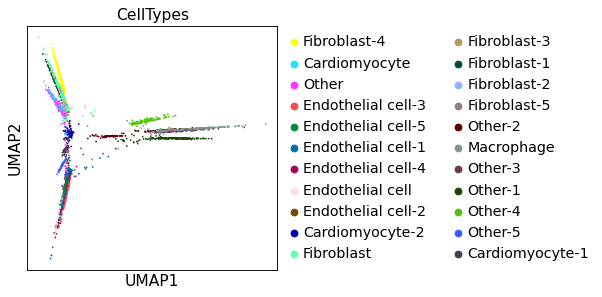

CPU times: user 699 ms, sys: 224 ms, total: 923 ms
Wall time: 657 ms


In [ ]:
%%time
sc.pl.umap(rna,
           color=['CellTypes'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

In [ ]:
# Marker gene identification
!pip install cosg
import cosg as cosg
import importlib
importlib.reload(cosg)

<module 'cosg' from '/usr/local/lib/python3.7/dist-packages/cosg/__init__.py'>

In [ ]:
%%time
import time
t0= time.clock()
cosg.cosg(rna,
    key_added='cosg',
        mu=1,
        n_genes_user=50,
               groupby='CellTypes')
runtime_cosg = time.clock() - t0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


**finished identifying marker genes by COSG**
CPU times: user 1.56 s, sys: 142 ms, total: 1.71 s
Wall time: 1.69 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [ ]:
sc.tl.dendrogram(rna,groupby='CellTypes',use_rep='X_pca')

Storing dendrogram info using `.uns['dendrogram_CellTypes']`


In [ ]:
!pip install scanpy==1.7
import scanpy as sc

In [ ]:
rna.var_names_make_unique()

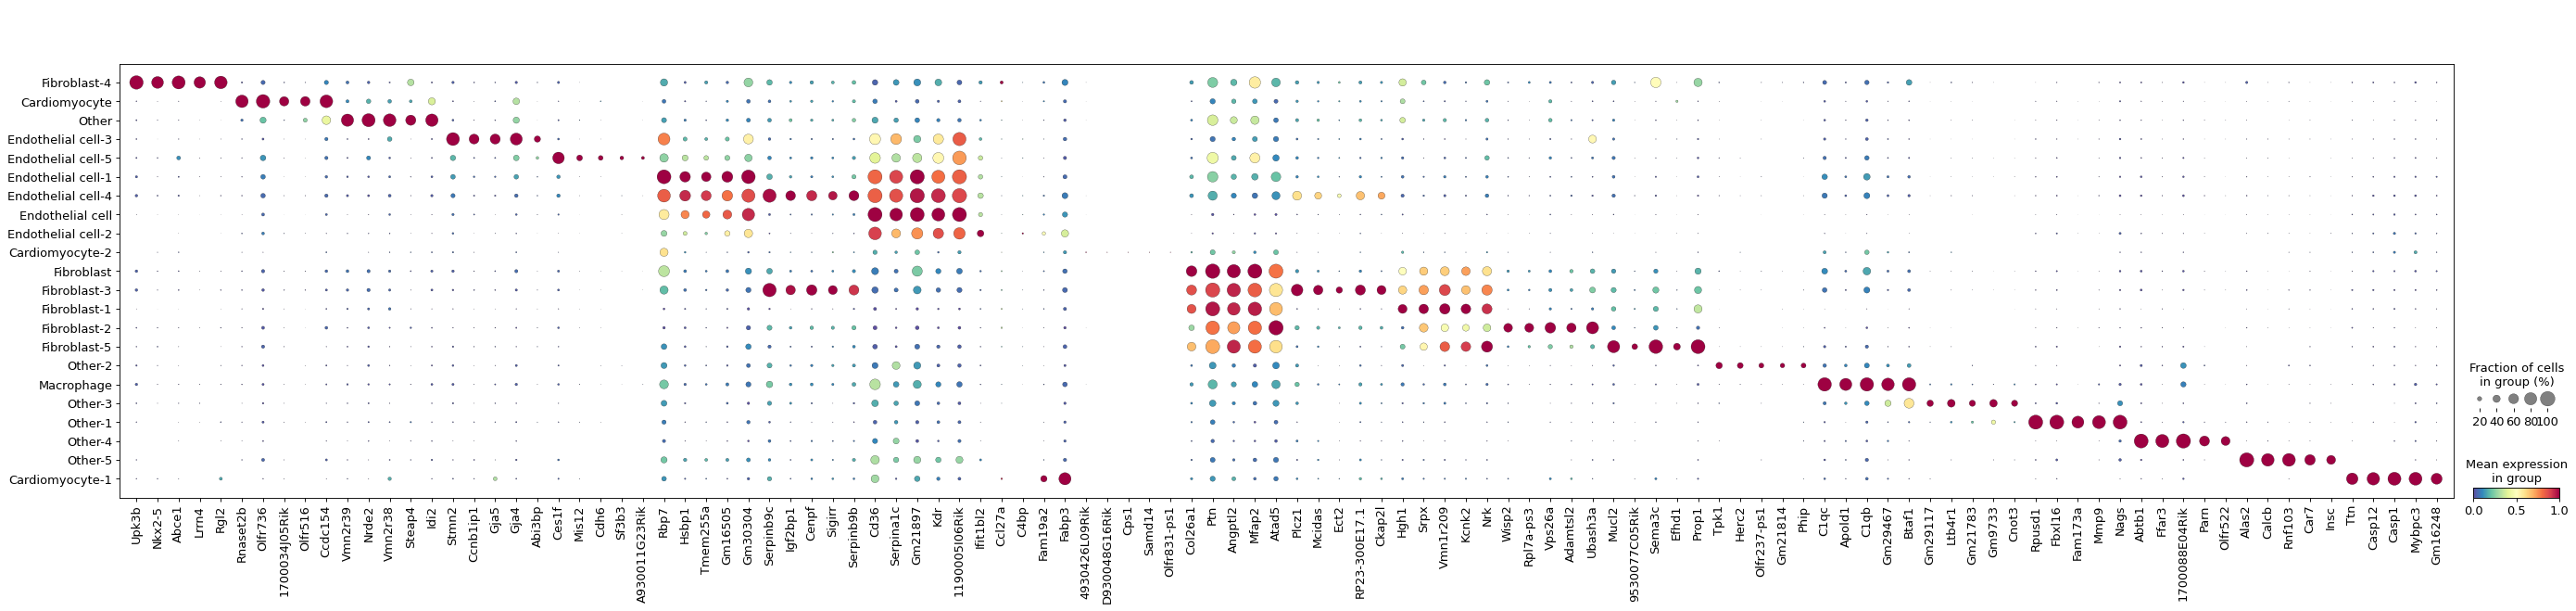

In [ ]:
# COSG结果
df_tmp=pd.DataFrame(rna.uns['cosg']['names'][:5,]).T
df_tmp.reindex(rna.obs['CellTypes'].cat.categories)
marker_genes_list=np.ravel(df_tmp.reindex(rna.obs['CellTypes'].cat.categories))
sc.pl.dotplot(rna, marker_genes_list,
             groupby='CellTypes',              
             dendrogram=False,
             standard_scale='var',
             cmap='Spectral_r')

In [ ]:
!pip install matplotlib==3.5
import scanpy as sc
import matplotlib

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/rna_glue_pre.h5ad")

# COSG 后处理
这里，我们使用COSG得到的标记基因，对SCSA中没判断出来细胞类型进行人工二次标记

同时我也使用论文里作者给出的标记基因，进行人工二次标记

In [ ]:
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/rna_glue_pre.h5ad")

In [ ]:
cmdt=pd.read_csv('/content/drive/MyDrive/MI/cmdt.csv',sep=',')
cmdt.drop(['Unnamed: 0'],axis=1,inplace=True)
cmdt

,Cell Type,Z-score,Cluster
0,Fibroblast,0.707107,0
1,Macrophage,-0.707107,0
2,Endothelial cell,1.788704,1
3,Cardiac progenitor cell,-0.424736,1
4,Atrial cell,-0.454656,1
5,Ventricular compact cell,-0.454656,1
6,Ventricular trabecular cell,-0.454656,1
7,Fibroblast,0.707107,10
8,Cardiomyocyte,-0.707107,10
9,Fibroblast,0.707107,11


In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(rna.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Fibroblast' 0.7071067811865476 0]]
[['Endothelial cell' 1.7887042470061572 1]]
[['Fibroblast' 1.154556251100974 2]]
[['Macrophage' 2.620841104061772 3]]
[['Cardiomyocyte' 0.3117249297608871 4]]
[['Endothelial cell' 1.7758443292314454 5]]
[[nan nan 6]]
[['Endothelial cell' 0.7071067811865475 7]]
[['Endothelial cell' 1.4668583024749635 8]]
[['Endothelial cell' 1.7888531787498467 9]]
[['Fibroblast' 0.7071067811865476 10]]
[['Fibroblast' 0.7071067811865476 11]]
[['Fibroblast' 1.1619876723523006 12]]
[['Endothelial cell' 1.788658540963751 13]]
[['Fibroblast' 2.753367672536184 14]]
[[nan nan 15]]
[[nan nan 16]]
[[nan nan 17]]
[[nan nan 18]]
[[nan nan 19]]
[['Cardiomyocyte' 45.79402053392923 20]]
[['Cardiomyocyte' 7.964122355750984 21]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(rna.obs.leiden))))]
#celltype[14]='Stem cell'
celltype[6]='Other'
celltype[15]='Other'
celltype[16]='Other'
celltype[17]='Other'
celltype[18]='Other'
celltype[19]='Other'
celltype

['Fibroblast',
 'Endothelial cell',
 'Fibroblast',
 'Macrophage',
 'Cardiomyocyte',
 'Endothelial cell',
 'Other',
 'Endothelial cell',
 'Endothelial cell',
 'Endothelial cell',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Endothelial cell',
 'Fibroblast',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Cardiomyocyte',
 'Cardiomyocyte']

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Fibroblast',
 'Endothelial cell',
 'Fibroblast-1',
 'Macrophage',
 'Cardiomyocyte',
 'Endothelial cell-1',
 'Other',
 'Endothelial cell-2',
 'Endothelial cell-3',
 'Endothelial cell-4',
 'Fibroblast-2',
 'Fibroblast-3',
 'Fibroblast-4',
 'Endothelial cell-5',
 'Fibroblast-5',
 'Other-1',
 'Other-2',
 'Other-3',
 'Other-4',
 'Other-5',
 'Cardiomyocyte-1',
 'Cardiomyocyte-2']

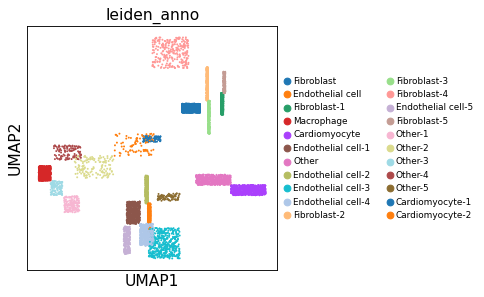

In [ ]:
#sc.pp.pca(adata)
#sc.pp.neighbors(adata,metric="cosine")
#sc.tl.umap(adata,random_state=41822099)
rna.obs['leiden_anno'] = rna.obs['leiden']
rna.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(rna, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

__init__() got an unexpected keyword argument 'location'  这个bug的出现，是因为matplotlib版本太小导致的

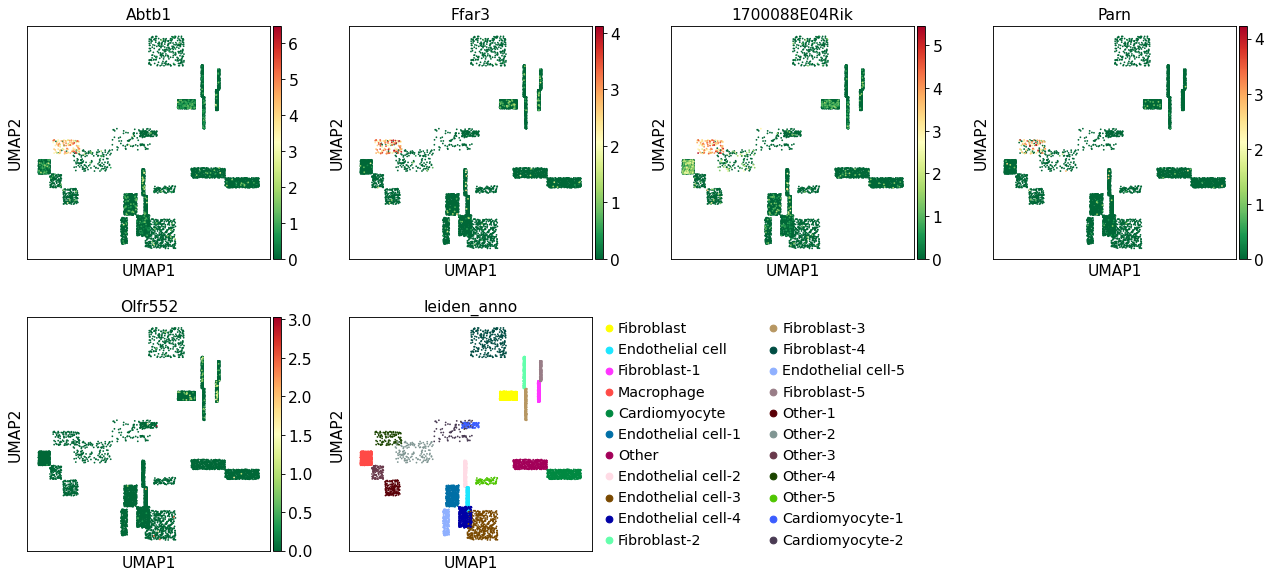

In [ ]:
#Other-4 #使用CellMarker和PanglaoDB数据库进行手工标注，标注为血小板，Platelets
sc.pl.umap(rna,color=['Abtb1','Ffar3','1700088E04Rik','Parn','Olfr552','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

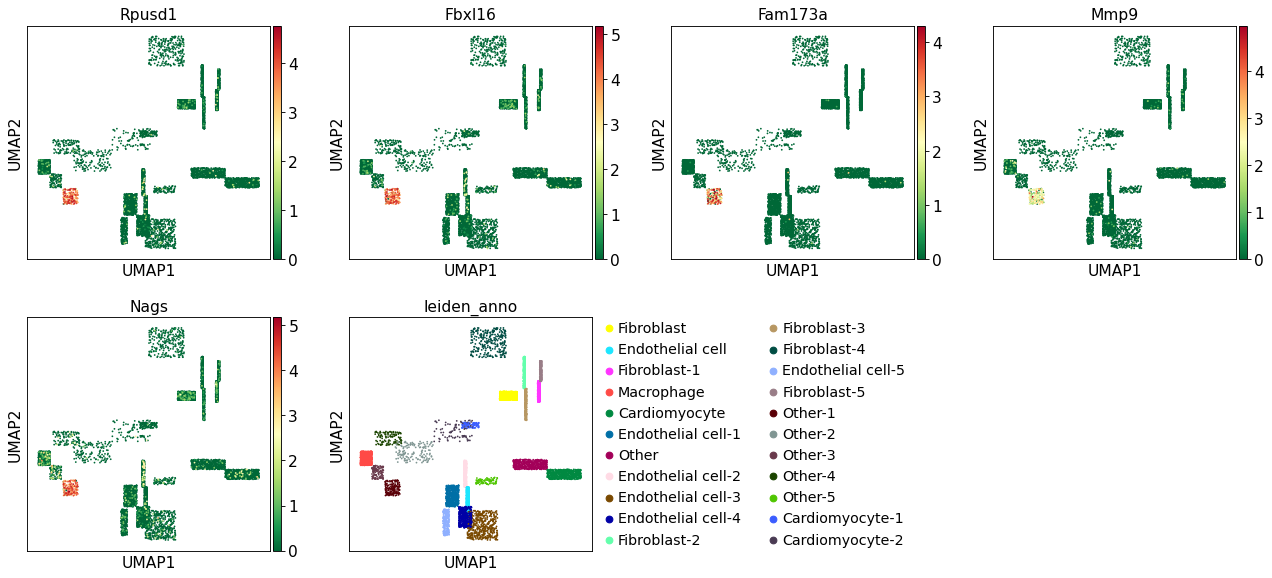

In [ ]:
#Other-1，标注为神经元Neruon
sc.pl.umap(rna,
           color=['Rpusd1','Fbxl16','Fam173a','Mmp9','Nags','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

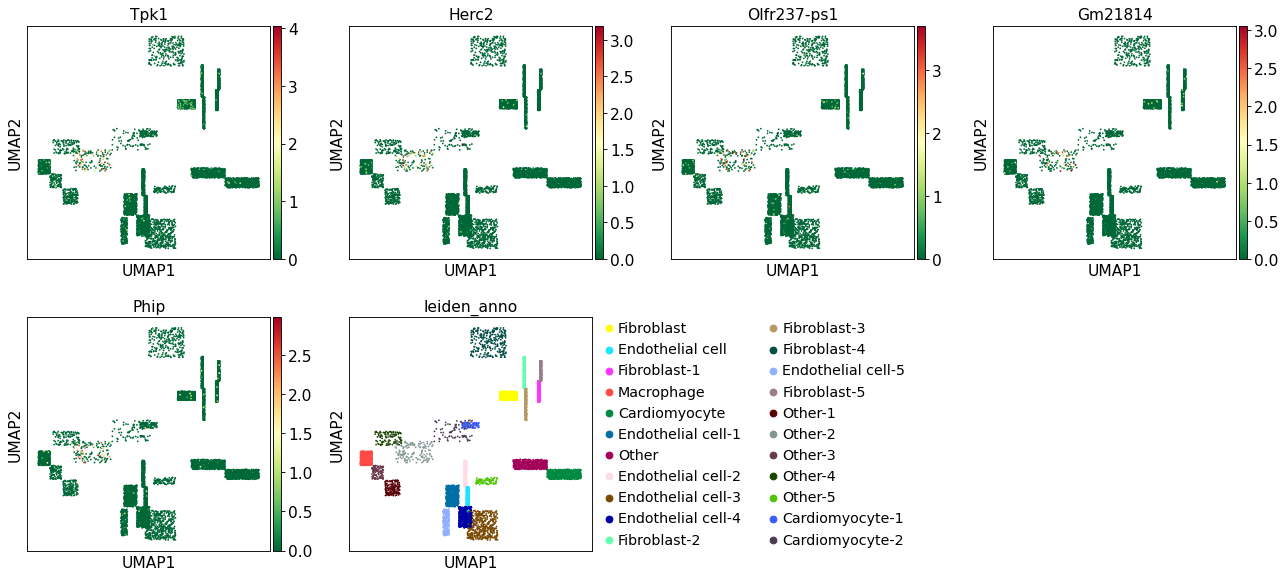

In [ ]:
#Other-2,标记基因极不明显，予以删除
sc.pl.umap(rna,
           color=['Tpk1','Herc2','Olfr237-ps1','Gm21814','Phip','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

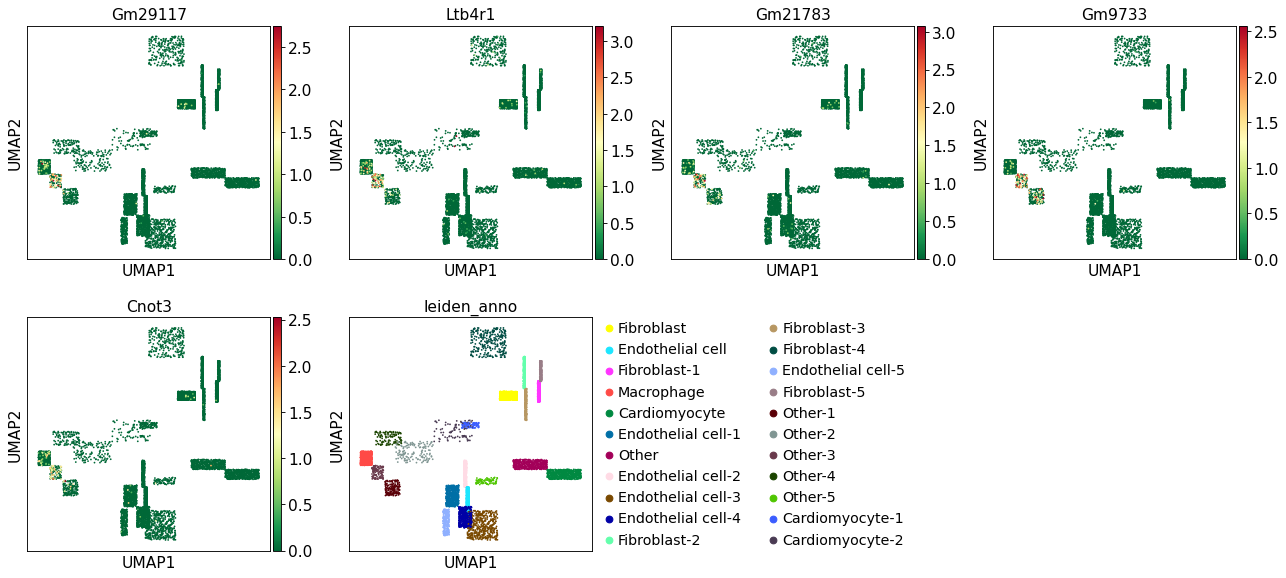

In [ ]:
#Other-3,标记基因极不明显，予以删除
sc.pl.umap(rna,
           color=['Gm29117','Ltb4r1','Gm21783','Gm9733','Cnot3','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

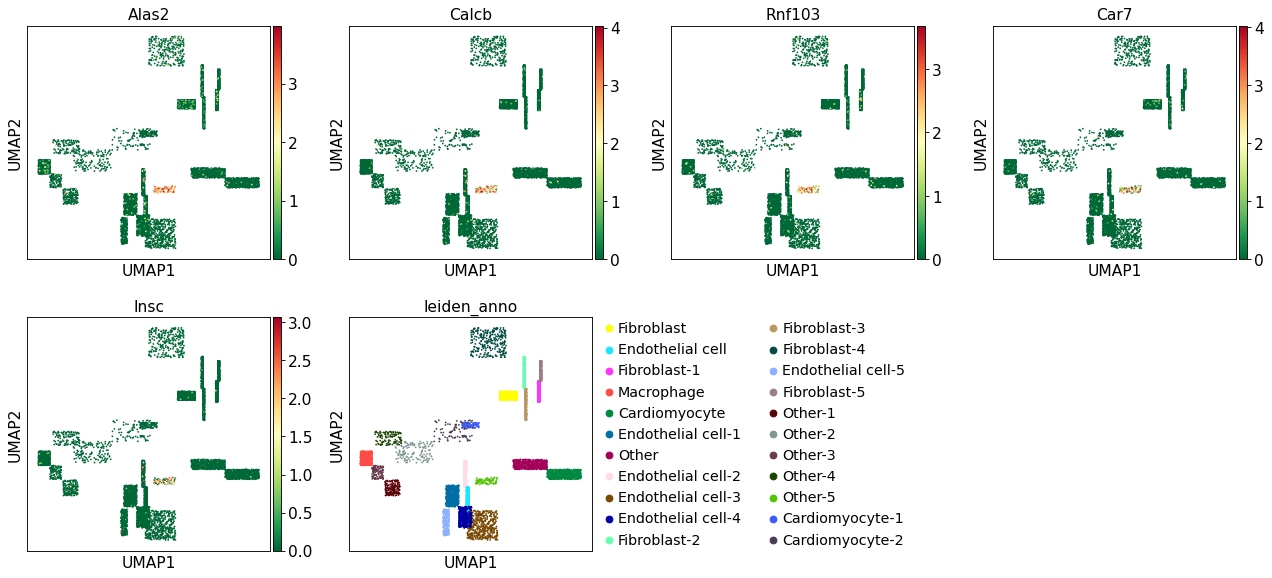

In [ ]:
#Other-5，判断为红细胞，予以删除
sc.pl.umap(rna,
           color=['Alas2','Calcb','Rnf103','Car7','Insc','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

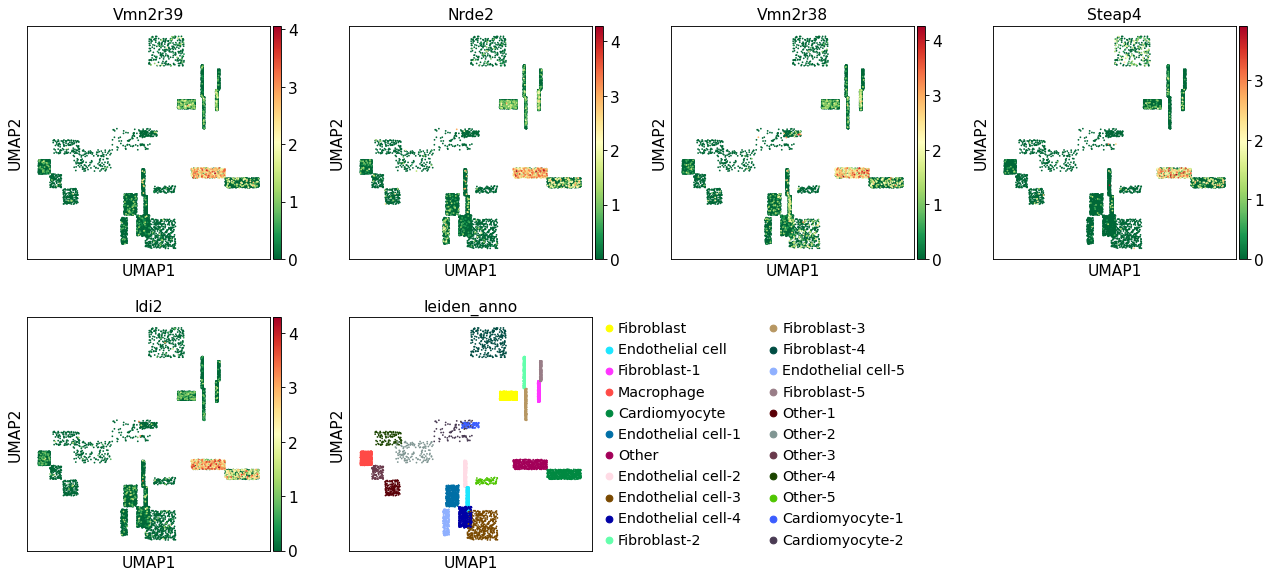

In [ ]:
#Other-4 #使用CellMarker和PanglaoDB数据库进行手工标注,标注为Pericytes（周细胞）
sc.pl.umap(rna,
           color=['Vmn2r39','Nrde2','Vmn2r38','Steap4','Idi2','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

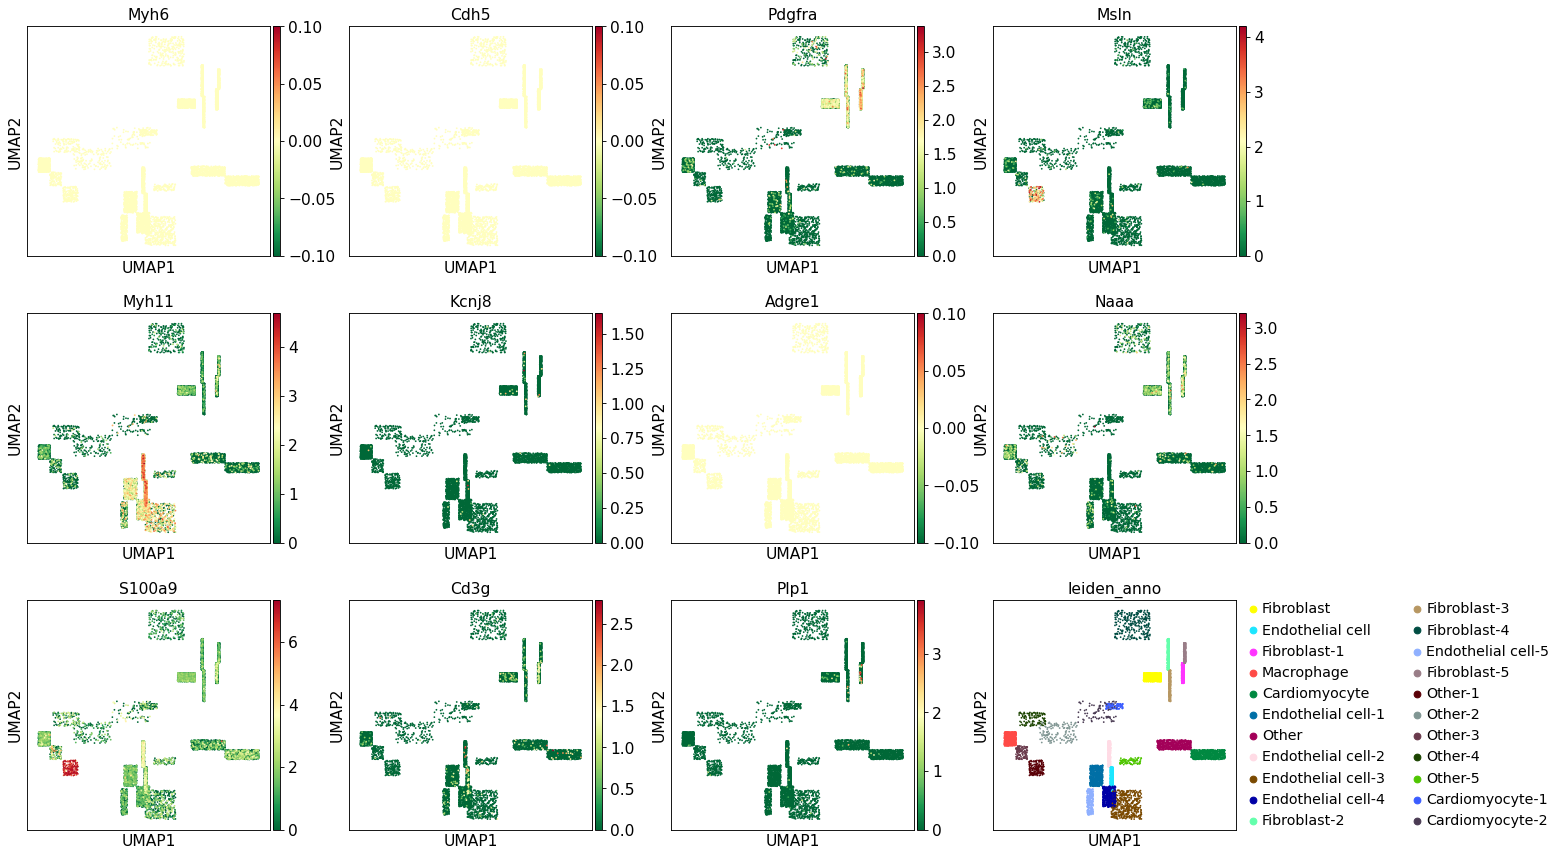

In [ ]:
#fibroblast-4
sc.pl.umap(rna,
           color=['Myh6','Cdh5','Pdgfra','Msln','Myh11','Kcnj8','Adgre1','Naaa','S100a9','Cd3g','Plp1','leiden_anno'],
           palette=sc.pl.palettes.default_102,
           size=10,
           frameon=True)

In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(rna.obs.leiden))))]
#celltype[14]='Stem cell'
celltype[1]='Smooth Muscle cells'
celltype[7]='Smooth Muscle cells'
celltype[6]='Pericytes'
celltype[15]='Granulocytes'
celltype[16]='Other'
celltype[17]='Other'
celltype[18]='Platelets'
celltype[19]='Erythroid cell'
celltype

['Fibroblast',
 'Smooth Muscle cells',
 'Fibroblast',
 'Macrophage',
 'Cardiomyocyte',
 'Endothelial cell',
 'Pericytes',
 'Smooth Muscle cells',
 'Endothelial cell',
 'Endothelial cell',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Endothelial cell',
 'Fibroblast',
 'Granulocytes',
 'Other',
 'Other',
 'Platelets',
 'Erythroid cell',
 'Cardiomyocyte',
 'Cardiomyocyte']

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type
rna.obs['leiden_anno'] = rna.obs['leiden']
rna.obs['leiden_anno'].cat.categories = new_type
rna.obs['CellTypes'] = rna.obs['leiden_anno']
rna.obs['CellTypes']

P8_3Sham_AAACCTGCATCGATTG-1             Granulocytes
P8_3Sham_AAACCTGTCAGTTTGG-1                Pericytes
P8_3Sham_AAACGGGAGCTAGTGG-1             Granulocytes
P8_3Sham_AAACGGGCATCGATTG-1    Smooth Muscle cells-1
P8_3Sham_AAACGGGGTAGCTTGT-1    Smooth Muscle cells-1
                                       ...          
P1_3MI_TTTGTCAAGCTAGTGG-1               Fibroblast-5
P1_3MI_TTTGTCAAGCTGATAA-1               Granulocytes
P1_3MI_TTTGTCAAGTGAAGTT-1                 Fibroblast
P1_3MI_TTTGTCACAGATCGGA-1         Endothelial cell-3
P1_3MI_TTTGTCATCTGGCGTG-1           Endothelial cell
Name: CellTypes, Length: 9679, dtype: category
Categories (22, object): ['Fibroblast', 'Smooth Muscle cells', 'Fibroblast-1', 'Macrophage', ...,
                          'Platelets', 'Erythroid cell', 'Cardiomyocyte-1', 'Cardiomyocyte-2']

In [ ]:
# 删除CellTypes中的Other-2、Other-3,红细胞（'Erythroid cell'）
rna = rna[rna.obs['CellTypes']!='Other',:]
rna = rna[rna.obs['CellTypes']!='Other-1',:]
rna = rna[rna.obs['CellTypes']!='Erythroid cell',:]
rna = rna[rna.obs['CellTypes']!='Platelets',:]
set(rna.obs['CellTypes'])

{'Cardiomyocyte',
 'Cardiomyocyte-1',
 'Cardiomyocyte-2',
 'Endothelial cell',
 'Endothelial cell-1',
 'Endothelial cell-2',
 'Endothelial cell-3',
 'Fibroblast',
 'Fibroblast-1',
 'Fibroblast-2',
 'Fibroblast-3',
 'Fibroblast-4',
 'Fibroblast-5',
 'Granulocytes',
 'Macrophage',
 'Pericytes',
 'Smooth Muscle cells',
 'Smooth Muscle cells-1'}

/usr/local/lib/python3.7/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


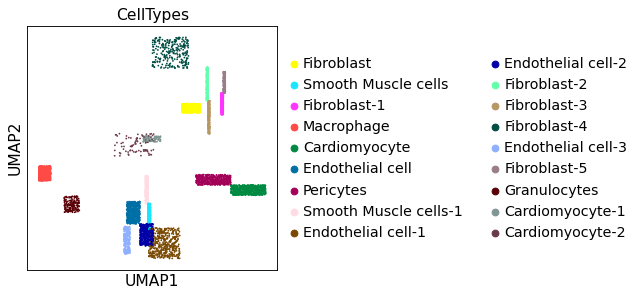

In [ ]:
sc.pl.umap(rna,color=['CellTypes'],palette=sc.pl.palettes.default_102,size=10,frameon=True)

In [ ]:
rna 

AnnData object with n_obs × n_vars = 9207 × 2778
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'dell'
    uns: 'Stem_Cell_Property_colors', 'Type_colors', 'hvg', 'leiden', 'leiden_anno_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap', 'CellTypes_colors'
    obsm: 'X_glue', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
rna.write_h5ad('/content/drive/MyDrive/MI/scRNA_glue_cosg.h5ad',compression="gzip")

# meta 配对

In [ ]:
# 载入原始数据
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_glue_cosg.h5ad")
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_glue.h5ad")
graph = nx.read_graphml("prior.graphml.gz")
glue = scglue.models.load_model("final.dill")
# 提取P8+3 dps的细胞
rna=rna[rna.obs['Type']=='P8+3 dps']
atac=atac[atac.obs['Type']=='P8+3 dps']
# 提取特征向量
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)
rna_loc=pd.DataFrame(rna.obsm['X_glue'], index=rna.obs.index)
atac_loc=pd.DataFrame(atac.obsm['X_glue'], index=atac.obs.index)

rna_loc.to_csv('rna_loc.csv')
atac_loc.to_csv('atac_loc.csv')

rna_loc=pd.read_csv('rna_loc.csv')
rna_loc.set_index(rna_loc.columns[0],inplace=True)
atac_loc=pd.read_csv('atac_loc.csv')
atac_loc.set_index(atac_loc.columns[0],inplace=True)
# 特征向量层面配对
len1=(len(atac_loc)//5000)+1
xl=[]
for j in range(len1):
  
  c=pd.DataFrame()
  for i in range(len1):
    t1=atac_loc.iloc[5000*(i):5000*(i+1)]
    t2=rna_loc.iloc[5000*(j):5000*(j+1)]
    a=np.corrcoef(t1,t2)[len(t1):,0:len(t1)]
    b=pd.DataFrame(a,index=t2.index,columns=t1.index)  
    
    c=pd.concat([c,b],axis=1)
    del t1
    del t2
    del a
    del b
  for i in range(len(c)):
    xl.append(c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0])
    c = c.drop([c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0]],axis=1)
  del c
  print('Now epoch is {}'.format(j)) 
res=pd.DataFrame(index=rna_loc.index)
res['pair']=xl
# 
pair=res
res.to_csv('pair_res.csv')
pair=pd.read_csv('pair_res.csv')
pair.columns=['scRNA','scATAC']
pair.head()
# 
new_name=[]
for i in range(len(pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)

# 提取配对列表
atac_only_pair=list(set(pair['scATAC']))
rna_only_pair=[]
for i in atac_only_pair:
  rna_only_pair.append(pair[pair['scATAC']==i]['scRNA'].iloc[0])
new_pair=pd.DataFrame()
new_pair['scRNA']=rna_only_pair
new_pair['scATAC']=atac_only_pair
new_name=[]
for i in range(len(new_pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)
new_pair['sample']=new_name

#提取rna_pair
delli=[]
for i in rna.obs.index:
  if i in rna_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
rna.obs['delli']=delli
rna_pair=rna[rna.obs['delli']=='tr']

#提取atac_pair
delli=[]
for i in atac.obs.index:
  if i in atac_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
atac.obs['delli']=delli
atac_pair=atac[atac.obs['delli']=='tr']


new_pair.to_csv('new_pair_P8_3_dps.csv')
!cp /content/new_pair_P8_3_dps.csv /content/drive/MyDrive/MI/
rna_pair.write_h5ad('/content/drive/MyDrive/MI/scRNA_P8_3_dps.h5ad',compression="gzip")
atac_pair.write_h5ad('/content/drive/MyDrive/MI/scATAC_P8_3_dps.h5ad',compression="gzip")

[INFO] autodevice: Using CPU as computation device.
Now epoch is 0
Now epoch is 1
Now epoch is 2


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [ ]:
# 载入原始数据
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_glue_cosg.h5ad")
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_glue.h5ad")
graph = nx.read_graphml("prior.graphml.gz")
glue = scglue.models.load_model("final.dill")
# 提取P8+3 dps的细胞
rna=rna[rna.obs['Type']=='P8+3 dpi']
atac=atac[atac.obs['Type']=='P8+3 dpi']
# 提取特征向量
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)
rna_loc=pd.DataFrame(rna.obsm['X_glue'], index=rna.obs.index)
atac_loc=pd.DataFrame(atac.obsm['X_glue'], index=atac.obs.index)

rna_loc.to_csv('rna_loc.csv')
atac_loc.to_csv('atac_loc.csv')

rna_loc=pd.read_csv('rna_loc.csv')
rna_loc.set_index(rna_loc.columns[0],inplace=True)
atac_loc=pd.read_csv('atac_loc.csv')
atac_loc.set_index(atac_loc.columns[0],inplace=True)
# 特征向量层面配对
len1=(len(atac_loc)//5000)+1
xl=[]
for j in range(len1):
  
  c=pd.DataFrame()
  for i in range(len1):
    t1=atac_loc.iloc[5000*(i):5000*(i+1)]
    t2=rna_loc.iloc[5000*(j):5000*(j+1)]
    a=np.corrcoef(t1,t2)[len(t1):,0:len(t1)]
    b=pd.DataFrame(a,index=t2.index,columns=t1.index)  
    
    c=pd.concat([c,b],axis=1)
    del t1
    del t2
    del a
    del b
  for i in range(len(c)):
    xl.append(c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0])
    c = c.drop([c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0]],axis=1)
  del c
  print('Now epoch is {}'.format(j)) 
res=pd.DataFrame(index=rna_loc.index)
res['pair']=xl
# 
pair=res
res.to_csv('pair_res.csv')
pair=pd.read_csv('pair_res.csv')
pair.columns=['scRNA','scATAC']
pair.head()
# 
new_name=[]
for i in range(len(pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)

# 提取配对列表
atac_only_pair=list(set(pair['scATAC']))
rna_only_pair=[]
for i in atac_only_pair:
  rna_only_pair.append(pair[pair['scATAC']==i]['scRNA'].iloc[0])
new_pair=pd.DataFrame()
new_pair['scRNA']=rna_only_pair
new_pair['scATAC']=atac_only_pair
new_name=[]
for i in range(len(new_pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)
new_pair['sample']=new_name

#提取rna_pair
delli=[]
for i in rna.obs.index:
  if i in rna_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
rna.obs['delli']=delli
rna_pair=rna[rna.obs['delli']=='tr']

#提取atac_pair
delli=[]
for i in atac.obs.index:
  if i in atac_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
atac.obs['delli']=delli
atac_pair=atac[atac.obs['delli']=='tr']


new_pair.to_csv('new_pair_P8_3_dpi.csv')
!cp /content/new_pair_P8_3_dpi.csv /content/drive/MyDrive/MI/
rna_pair.write_h5ad('/content/drive/MyDrive/MI/scRNA_P8_3_dpi.h5ad',compression="gzip")
atac_pair.write_h5ad('/content/drive/MyDrive/MI/scATAC_P8_3_dpi.h5ad',compression="gzip")

Now epoch is 0
Now epoch is 1


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [ ]:
# 载入原始数据
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_glue_cosg.h5ad")
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_glue.h5ad")
graph = nx.read_graphml("prior.graphml.gz")
glue = scglue.models.load_model("final.dill")
# 提取P8+3 dps的细胞
rna=rna[rna.obs['Type']=='P1+3 dps']
atac=atac[atac.obs['Type']=='P1+3 dps']
# 提取特征向量
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)
rna_loc=pd.DataFrame(rna.obsm['X_glue'], index=rna.obs.index)
atac_loc=pd.DataFrame(atac.obsm['X_glue'], index=atac.obs.index)

rna_loc.to_csv('rna_loc.csv')
atac_loc.to_csv('atac_loc.csv')

rna_loc=pd.read_csv('rna_loc.csv')
rna_loc.set_index(rna_loc.columns[0],inplace=True)
atac_loc=pd.read_csv('atac_loc.csv')
atac_loc.set_index(atac_loc.columns[0],inplace=True)
# 特征向量层面配对
len1=(len(atac_loc)//5000)+1
xl=[]
for j in range(len1):
  
  c=pd.DataFrame()
  for i in range(len1):
    t1=atac_loc.iloc[5000*(i):5000*(i+1)]
    t2=rna_loc.iloc[5000*(j):5000*(j+1)]
    a=np.corrcoef(t1,t2)[len(t1):,0:len(t1)]
    b=pd.DataFrame(a,index=t2.index,columns=t1.index)  
    c=pd.concat([c,b],axis=1)
    del t1
    del t2
    del a
    del b
  for i in range(len(c)):
    xl.append(c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0])
    c = c.drop([c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0]],axis=1)
  del c
  print('Now epoch is {}'.format(j)) 
res=pd.DataFrame(index=rna_loc.index)
res['pair']=xl
# 
pair=res
res.to_csv('pair_res.csv')
pair=pd.read_csv('pair_res.csv')
pair.columns=['scRNA','scATAC']
pair.head()
# 
new_name=[]
for i in range(len(pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)

# 提取配对列表
atac_only_pair=list(set(pair['scATAC']))
rna_only_pair=[]
for i in atac_only_pair:
  rna_only_pair.append(pair[pair['scATAC']==i]['scRNA'].iloc[0])
new_pair=pd.DataFrame()
new_pair['scRNA']=rna_only_pair
new_pair['scATAC']=atac_only_pair
new_name=[]
for i in range(len(new_pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)
new_pair['sample']=new_name

#提取rna_pair
delli=[]
for i in rna.obs.index:
  if i in rna_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
rna.obs['delli']=delli
rna_pair=rna[rna.obs['delli']=='tr']

#提取atac_pair
delli=[]
for i in atac.obs.index:
  if i in atac_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
atac.obs['delli']=delli
atac_pair=atac[atac.obs['delli']=='tr']


new_pair.to_csv('new_pair_P1_3_dps.csv')
!cp /content/new_pair_P1_3_dps.csv /content/drive/MyDrive/MI/
rna_pair.write_h5ad('/content/drive/MyDrive/MI/scRNA_P1_3_dps.h5ad',compression="gzip")
atac_pair.write_h5ad('/content/drive/MyDrive/MI/scATAC_P1_3_dps.h5ad',compression="gzip")

Now epoch is 0
Now epoch is 1
Now epoch is 2


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [ ]:
# 载入原始数据
rna = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_glue_cosg.h5ad")
atac = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_glue.h5ad")
graph = nx.read_graphml("prior.graphml.gz")
glue = scglue.models.load_model("final.dill")
# 提取P8+3 dps的细胞
rna=rna[rna.obs['Type']=='P1+3 dpi']
atac=atac[atac.obs['Type']=='P1+3 dpi']
# 提取特征向量
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)
rna_loc=pd.DataFrame(rna.obsm['X_glue'], index=rna.obs.index)
atac_loc=pd.DataFrame(atac.obsm['X_glue'], index=atac.obs.index)

rna_loc.to_csv('rna_loc.csv')
atac_loc.to_csv('atac_loc.csv')

rna_loc=pd.read_csv('rna_loc.csv')
rna_loc.set_index(rna_loc.columns[0],inplace=True)
atac_loc=pd.read_csv('atac_loc.csv')
atac_loc.set_index(atac_loc.columns[0],inplace=True)
# 特征向量层面配对
len1=(len(atac_loc)//5000)+1
xl=[]
for j in range(len1):
  
  c=pd.DataFrame()
  for i in range(len1):
    t1=atac_loc.iloc[5000*(i):5000*(i+1)]
    t2=rna_loc.iloc[5000*(j):5000*(j+1)]
    a=np.corrcoef(t1,t2)[len(t1):,0:len(t1)]
    b=pd.DataFrame(a,index=t2.index,columns=t1.index)  
    c=pd.concat([c,b],axis=1)
    del t1
    del t2
    del a
    del b
  for i in range(len(c)):
    xl.append(c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0])
    c = c.drop([c.columns[np.where(c.iloc[i]==c.iloc[i].max())[0]].values[0]],axis=1)
  del c
  print('Now epoch is {}'.format(j)) 
res=pd.DataFrame(index=rna_loc.index)
res['pair']=xl
# 
pair=res
res.to_csv('pair_res.csv')
pair=pd.read_csv('pair_res.csv')
pair.columns=['scRNA','scATAC']
pair.head()

# 提取配对列表
atac_only_pair=list(set(pair['scATAC']))
rna_only_pair=list(set(pair['scRNA']))
for i in atac_only_pair:
  rna_only_pair.append(pair[pair['scATAC']==i]['scRNA'].iloc[0])
new_pair=pd.DataFrame()
new_pair['scRNA']=rna_only_pair
new_pair['scATAC']=atac_only_pair
new_pair=pair
new_name=[]
for i in range(len(new_pair)):
  k='cell_{0}'.format(i)
  new_name.append(k)
new_pair['sample']=new_name

#提取rna_pair
delli=[]
for i in rna.obs.index:
  if i in rna_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
rna.obs['delli']=delli
rna_pair=rna[rna.obs['delli']=='tr']

#提取atac_pair
delli=[]
for i in atac.obs.index:
  if i in atac_only_pair:
    delli.append('tr')
  else:
    delli.append('fa')
atac.obs['delli']=delli
atac_pair=atac[atac.obs['delli']=='tr']


new_pair.to_csv('new_pair_P1_3_dpi.csv')
!cp /content/new_pair_P1_3_dpi.csv /content/drive/MyDrive/MI/
rna_pair.write_h5ad('/content/drive/MyDrive/MI/scRNA_P1_3_dpi.h5ad',compression="gzip")
atac_pair.write_h5ad('/content/drive/MyDrive/MI/scATAC_P1_3_dpi.h5ad',compression="gzip")

Now epoch is 0
Now epoch is 1


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [ ]:
pair_P1_dpi = pd.read_csv('/content/new_pair_P1_3_dpi.csv')
pair_P1_dps = pd.read_csv('/content/new_pair_P1_3_dps.csv') 
pair_P8_dpi = pd.read_csv('/content/new_pair_P8_3_dpi.csv') 
pair_P8_dps = pd.read_csv('/content/new_pair_P8_3_dps.csv') 

pair = pd.concat([pair_P1_dpi,pair_P1_dps,pair_P8_dpi,pair_P8_dps])
pair

,Unnamed: 0,scRNA,scATAC,sample
0,0,P1_3MI_AAACCTGGTAGCGATG-1,GCCCAGATCGTGGGTC-1,cell_0
1,1,P1_3MI_AAACCTGGTTCGCGAC-1,CTCGCTAGTCAGCAAG-1,cell_1
2,2,P1_3MI_AAACCTGTCGTAGATC-1,CAGTGCGGTTTGGATC-1,cell_2
3,3,P1_3MI_AAACCTGTCTTGTTTG-1,CCGAAGCTCTTCAGAG-1,cell_3
4,4,P1_3MI_AAACGGGCAAGCTGGA-1,AGCTGATGTGCAAGCA-1,cell_4
...,...,...,...,...
1297,1297,P8_3Sham_TGTTCCGCACACTGCG-1,AAACTCGAGGGATCCA-4,cell_1297
1298,1298,P8_3Sham_CAGGTGCTCATGCATG-1,AGATTCGAGTATACCC-4,cell_1298
1299,1299,P8_3Sham_CGTGAGCCATGGTTGT-1,TCTAGTTAGACCATAA-4,cell_1299
1300,1300,P8_3Sham_GTAGGCCCATCTCCCA-1,GTCACGGTCACAAGCT-4,cell_1300


In [ ]:
rna_P1_dpi = anndata.read_h5ad('/content/drive/MyDrive/MI/scRNA_P1_3_dpi.h5ad')
rna_P1_dps = anndata.read_h5ad('/content/drive/MyDrive/MI/scRNA_P1_3_dps.h5ad') 
rna_P8_dpi = anndata.read_h5ad('/content/drive/MyDrive/MI/scRNA_P8_3_dpi.h5ad') 
rna_P8_dps = anndata.read_h5ad('/content/drive/MyDrive/MI/scRNA_P8_3_dps.h5ad') 

rna_P1_dpi_obs = rna_P1_dpi.obs
rna_P1_dps_obs = rna_P1_dps.obs 
rna_P8_dpi_obs = rna_P8_dpi.obs 
rna_P8_dps_obs = rna_P8_dps.obs

a = pd.merge(rna_P1_dpi_obs,rna_P1_dps_obs,how='outer',left_index=True,right_index=True)
b = pd.merge(a,rna_P8_dpi_obs,how='outer',left_index=True,right_index=True)
obs = pd.merge(b,rna_P8_dps_obs,how='outer',left_index=True,right_index=True)

rna = anndata.concat([rna_P1_dpi, rna_P1_dps, rna_P8_dpi,rna_P8_dps])
rna

AnnData object with n_obs × n_vars = 9207 × 2778
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'domain', 'leiden_anno', 'CellTypes', 'delli'
    obsm: 'X_glue', 'X_pca', 'X_umap'
    layers: 'counts'

In [ ]:
atac_P1_dpi = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_P1_3_dpi.h5ad')
atac_P1_dps = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_P1_3_dps.h5ad') 
atac_P8_dpi = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_P8_3_dpi.h5ad') 
atac_P8_dps = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_P8_3_dps.h5ad') 

atac_P1_dpi_obs = atac_P1_dpi.obs
atac_P1_dps_obs = atac_P1_dps.obs 
atac_P8_dpi_obs = atac_P8_dpi.obs 
atac_P8_dps_obs = atac_P8_dps.obs

a = pd.merge(atac_P1_dpi_obs,atac_P1_dps_obs,how='outer',left_index=True,right_index=True)
b = pd.merge(a,atac_P8_dpi_obs,how='outer',left_index=True,right_index=True)
obs = pd.merge(b,atac_P8_dps_obs,how='outer',left_index=True,right_index=True)

atac = anndata.concat([atac_P1_dpi, atac_P1_dps, atac_P8_dpi,atac_P8_dps])
#atac.obs=obs
atac


AnnData object with n_obs × n_vars = 9207 × 50017
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features', 'delli'
    obsm: 'X_glue', 'X_lsi', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'binary'

In [ ]:
rna.obs['sample']=pair['sample'].values
atac.obs['sample']=pair['sample'].values
atac.obs['CellTypes']=rna.obs['CellTypes'].values

rna.obs['domain']='scRNA-seq'
atac.obs['domain']='scATAC-seq'

In [ ]:
combined = anndata.concat([rna, atac])

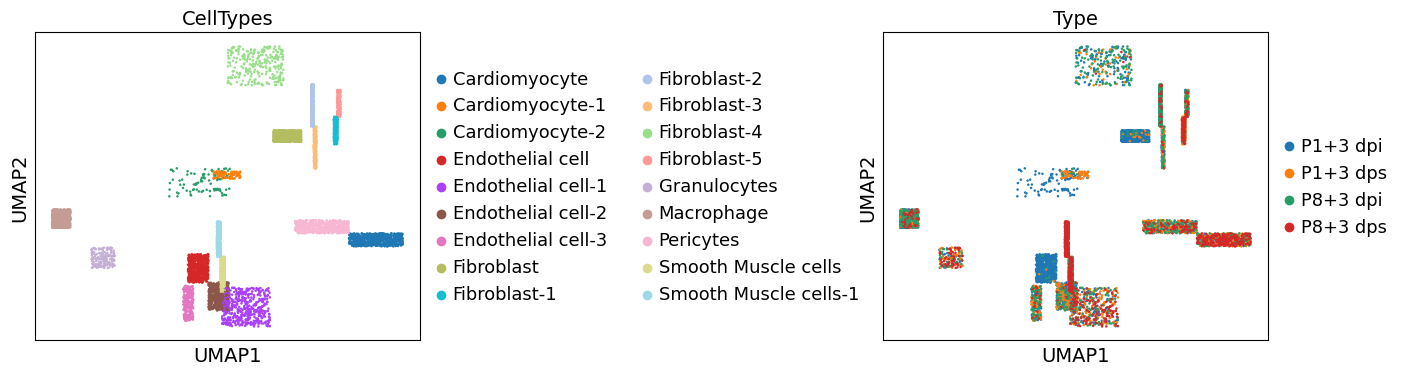

In [ ]:
sc.pp.neighbors(rna, use_rep="X_glue", metric="cosine")
sc.pl.umap(rna, color=["CellTypes","Type"], wspace=1)

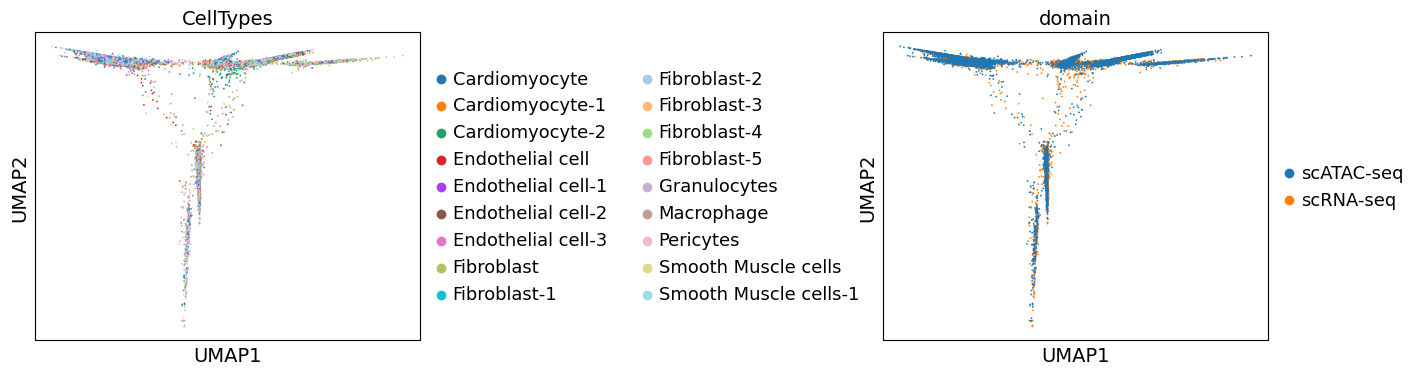

In [ ]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(combined, color=['CellTypes','domain'], wspace=1)

In [ ]:
rna.write_h5ad('/content/drive/MyDrive/MI/scRNA_MI3.h5ad',compression="gzip")
atac.write_h5ad('/content/drive/MyDrive/MI/scATAC_MI3.h5ad',compression="gzip")

In [ ]:
new_pair_P1_3_dpi = pd.read_csv('/content/drive/MyDrive/MI/new_pair_P1_3_dpi.csv')
new_pair_P1_3_dps = pd.read_csv('/content/drive/MyDrive/MI/new_pair_P1_3_dps.csv')
new_pair_P8_3_dpi = pd.read_csv('/content/drive/MyDrive/MI/new_pair_P8_3_dpi.csv')
new_pair_P8_3_dps = pd.read_csv('/content/drive/MyDrive/MI/new_pair_P8_3_dps.csv')

In [ ]:
a = pd.merge(new_pair_P1_3_dpi,new_pair_P1_3_dps,how='outer')
b = pd.merge(a,new_pair_P8_3_dpi,how='outer')
pair = pd.merge(b,new_pair_P8_3_dps,how='outer')
pair.drop(['Unnamed: 0'],axis=1,inplace=True)
pair.to_csv('/content/drive/MyDrive/MI/new_pair.csv')